# The Ups and Downs of the US National Park.

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
import numpy as np
import re

% matplotlib inline

In [77]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [81]:
#Turn off scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

In [82]:
visits = pd.read_excel('visitation.xlsx').fillna(0).drop(columns=['Average'])
visits.head()

,Park Name,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Abraham Lincoln Birthplace NHP,250842.00,251204.00,236180.00,229675.00,250772.00,211650.00,201828.00,190809.00,200054.00,...,200404.00,221111.00,177122.00,163568.00,169515.00,163928.00,241264.00,148605.00,252495.00,269580
1,Acadia NP,2594497.00,2602227.00,2469238.00,2516551.00,2558572.00,2431062.00,2207847.00,2051484.00,2083588.00,...,2075857.00,2227698.00,2504208.00,2374645.00,2431052.00,2254922.00,2563129.00,2811184.00,3303393.00,3509271
2,Adams NHP,63569.00,84574.00,87347.00,167500.00,173944.00,215659.00,239504.00,220467.00,225318.00,...,241536.00,253656.00,73339.00,219975.00,336031.00,285501.00,178468.00,183632.00,199301.00,255562
3,African Burial Ground NM,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,117113.00,108585.00,77624.00,93234.00,54861.00,56348.00,46526.00,43182
4,Agate Fossil Beds NM,17594.00,18117.00,17933.00,17399.00,17129.00,16233.00,15235.00,14209.00,13521.00,...,12425.00,12694.00,12509.00,11617.00,11824.00,10504.00,12440.00,13264.00,15555.00,32038


In [91]:
years = list(visits.columns.values)[1:]
years

[1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017]

In [94]:
#wide to long data form
visits = pd.melt(visits, id_vars='Park Name', value_vars=years)

In [95]:
visits.head()

,Park Name,variable,value
0,Abraham Lincoln Birthplace NHP,1998,250842.00
1,Acadia NP,1998,2594497.00
2,Adams NHP,1998,63569.00
3,African Burial Ground NM,1998,0.00
4,Agate Fossil Beds NM,1998,17594.00


In [96]:
#changing column name
visits.rename(columns={'variable': 'Year', 'value': 'Visits'}, inplace=True)

In [97]:
visits.head()

,Park Name,Year,Visits
0,Abraham Lincoln Birthplace NHP,1998,250842.00
1,Acadia NP,1998,2594497.00
2,Adams NHP,1998,63569.00
3,African Burial Ground NM,1998,0.00
4,Agate Fossil Beds NM,1998,17594.00


## Part 0: How is the total visits to all National Park Service site change over the past 20 years?
***National Park Service sites includes national parks, national historic sites, battlefileds, natural preserve, national monuments, etc. ***

In [24]:
from matplotlib.ticker import FuncFormatter

#step1: build a function
# it should take value and pos
def with_commas(value,x_pos):
    
    return "{:,}".format(int(value))

formatter = FuncFormatter(with_commas)



In [108]:
visits['date_year'] = pd.to_datetime(visits['Year'],format = '%Y')

In [109]:
visits.head()

,Park Name,Year,Visits,date_year
0,Abraham Lincoln Birthplace NHP,1998,250842.00,1998-01-01
1,Acadia NP,1998,2594497.00,1998-01-01
2,Adams NHP,1998,63569.00,1998-01-01
3,African Burial Ground NM,1998,0.00,1998-01-01
4,Agate Fossil Beds NM,1998,17594.00,1998-01-01


In [110]:
# def with_commas(value,x_pos):
    
#     return "{:,}".format(int(value))

def with_millions(value,x_pos):
    millions = int(value/1000000)
    if millions == 330:
        
        return "{} MM".format(millions)
    elif millions ==0:
        return 0
    else:
        return millions

formatter = FuncFormatter(with_millions)

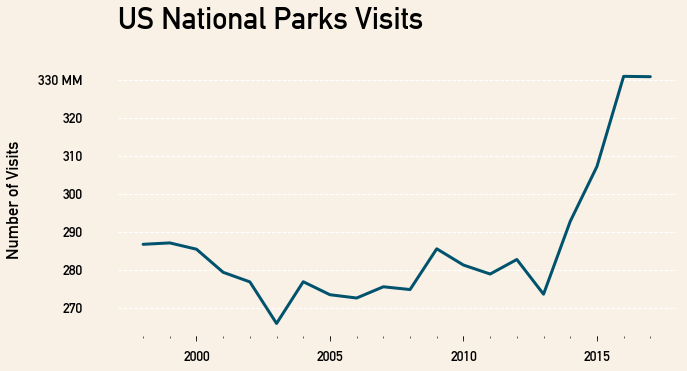

In [111]:

plt.rcParams.update({
  'lines.linewidth': 3,
  'lines.solid_capstyle': 'round',
  'font.family':'DIN ALTERNATE' ,
  'font.stretch':'normal',
  'legend.fancybox': False,
  'legend.frameon':False,
  'axes.prop_cycle': cycler('color', ['#00526d','#f0bb7f','#d9816b','#90ced6','#81ba9a','#f15b40']),
  'axes.facecolor': '#f9f1e6',
 'axes.grid': True,
  'axes.labelsize': 'large',
  'axes.axisbelow': True,
  'axes.formatter.limits':[-20,20],
  'axes.edgecolor': '#00526d',
  'axes.linewidth': 1.0,
  'axes.titlesize': 'x-large',
    'axes.spines.left'   : False,
    'axes.spines.bottom' : False,
    'axes.spines.top'    : False,
    'axes.spines.right'  : False,
 
  'grid.linestyle': '--',
  'grid.linewidth': 1.0,
  'grid.color': '#FFFFFF',

    'xtick.major.pad': 10,
    'ytick.major.pad': 35,
    'ytick.left'           : True,
    'ytick.direction'      : 'out',
  'xtick.major.size': 5,
  'xtick.minor.size': 2,
  'ytick.major.size': 0,
  'ytick.minor.size': 0,
    'xtick.minor.visible'  : True,
  'font.size': 14.0,
  'figure.facecolor': '#f9f1e6',
'savefig.facecolor'   :  '#f9f1e6'  # figure facecolor when saving

})

#set number of tickers


import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
majorLocator = MultipleLocator(1)
majorFormatter = FormatStrFormatter('%d')



# plt.setp( ax.yaxis.get_majorticklabels(), ha="center" )

ax = visits.groupby('date_year').Visits.sum().plot(x='Year',kind = 'line',figsize=(10,5))
ax.yaxis.set_major_formatter(formatter)
plt.title("US National Parks Visits",pad = 35,loc='left',fontsize=30)

ax.grid(False, axis='x')
ax.set_ylabel("Number of Visits",labelpad = 15)
ax.set_xlabel("")
#ax.set_ylim(0,4200000)

ax.xaxis.tick_bottom()


# plt.savefig("total_visits.pdf",bbox_inches='tight')
# plt.savefig('total_visits.png',dpi = 600, bbox_inches='tight')
# plt.show()

## Part 1: How Does the Number of Visits to the US National Parks Changed Over time? What are the most popular national parks in 2017, how's their popularity change along time?

***Now let's narrow down the NPS to only the national parks (NP)***

In [60]:
visits_long = pd.read_excel('visitation.xlsx').fillna(0).drop('Average',axis=1)
visits_long.head(10)

,Park Name,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Abraham Lincoln Birthplace NHP,250842.0,251204.0,236180.0,229675.0,250772.0,211650.0,201828.0,190809.0,200054.0,...,200404.0,221111.0,177122.0,163568.0,169515.0,163928.0,241264.0,148605.0,252495.0,269580
1,Acadia NP,2594497.0,2602227.0,2469238.0,2516551.0,2558572.0,2431062.0,2207847.0,2051484.0,2083588.0,...,2075857.0,2227698.0,2504208.0,2374645.0,2431052.0,2254922.0,2563129.0,2811184.0,3303393.0,3509271
2,Adams NHP,63569.0,84574.0,87347.0,167500.0,173944.0,215659.0,239504.0,220467.0,225318.0,...,241536.0,253656.0,73339.0,219975.0,336031.0,285501.0,178468.0,183632.0,199301.0,255562
3,African Burial Ground NM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,117113.0,108585.0,77624.0,93234.0,54861.0,56348.0,46526.0,43182
4,Agate Fossil Beds NM,17594.0,18117.0,17933.0,17399.0,17129.0,16233.0,15235.0,14209.0,13521.0,...,12425.0,12694.0,12509.0,11617.0,11824.0,10504.0,12440.0,13264.0,15555.0,32038
5,Alibates Flint Quarries NM,3293.0,3047.0,3131.0,2456.0,2125.0,1811.0,2012.0,2919.0,1882.0,...,2297.0,2918.0,4350.0,3214.0,3383.0,1555.0,4513.0,9492.0,8153.0,6613
6,Allegheny Portage Railroad NHS,111100.0,111391.0,133396.0,142340.0,146484.0,129995.0,126441.0,115357.0,121009.0,...,113991.0,118931.0,107363.0,118410.0,138864.0,107977.0,172883.0,168433.0,189371.0,201837
7,Amistad NRA,1129811.0,1164166.0,1234506.0,1097650.0,1047784.0,1071199.0,1445772.0,1399852.0,1599271.0,...,1980717.0,2573966.0,1574322.0,1436759.0,1367502.0,1025151.0,1130096.0,1250051.0,1164530.0,1221635
8,Andersonville NHS,225653.0,182539.0,167373.0,160974.0,190004.0,150661.0,165929.0,132466.0,132153.0,...,159592.0,136267.0,121535.0,108812.0,122883.0,98771.0,127189.0,136686.0,134216.0,132149
9,Andrew Johnson NHS,60207.0,51779.0,59897.0,49551.0,48878.0,51910.0,50196.0,48552.0,50701.0,...,69433.0,63296.0,60323.0,52322.0,51261.0,42929.0,42863.0,45357.0,45937.0,53998


In [61]:
visits_long

,Park Name,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Abraham Lincoln Birthplace NHP,250842.0,251204.0,236180.0,229675.0,250772.0,211650.0,201828.0,190809.0,200054.0,...,200404.0,221111.0,177122.0,163568.0,169515.0,163928.0,241264.0,148605.0,252495.0,269580
1,Acadia NP,2594497.0,2602227.0,2469238.0,2516551.0,2558572.0,2431062.0,2207847.0,2051484.0,2083588.0,...,2075857.0,2227698.0,2504208.0,2374645.0,2431052.0,2254922.0,2563129.0,2811184.0,3303393.0,3509271
2,Adams NHP,63569.0,84574.0,87347.0,167500.0,173944.0,215659.0,239504.0,220467.0,225318.0,...,241536.0,253656.0,73339.0,219975.0,336031.0,285501.0,178468.0,183632.0,199301.0,255562
3,African Burial Ground NM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,117113.0,108585.0,77624.0,93234.0,54861.0,56348.0,46526.0,43182
4,Agate Fossil Beds NM,17594.0,18117.0,17933.0,17399.0,17129.0,16233.0,15235.0,14209.0,13521.0,...,12425.0,12694.0,12509.0,11617.0,11824.0,10504.0,12440.0,13264.0,15555.0,32038
5,Alibates Flint Quarries NM,3293.0,3047.0,3131.0,2456.0,2125.0,1811.0,2012.0,2919.0,1882.0,...,2297.0,2918.0,4350.0,3214.0,3383.0,1555.0,4513.0,9492.0,8153.0,6613
6,Allegheny Portage Railroad NHS,111100.0,111391.0,133396.0,142340.0,146484.0,129995.0,126441.0,115357.0,121009.0,...,113991.0,118931.0,107363.0,118410.0,138864.0,107977.0,172883.0,168433.0,189371.0,201837
7,Amistad NRA,1129811.0,1164166.0,1234506.0,1097650.0,1047784.0,1071199.0,1445772.0,1399852.0,1599271.0,...,1980717.0,2573966.0,1574322.0,1436759.0,1367502.0,1025151.0,1130096.0,1250051.0,1164530.0,1221635
8,Andersonville NHS,225653.0,182539.0,167373.0,160974.0,190004.0,150661.0,165929.0,132466.0,132153.0,...,159592.0,136267.0,121535.0,108812.0,122883.0,98771.0,127189.0,136686.0,134216.0,132149
9,Andrew Johnson NHS,60207.0,51779.0,59897.0,49551.0,48878.0,51910.0,50196.0,48552.0,50701.0,...,69433.0,63296.0,60323.0,52322.0,51261.0,42929.0,42863.0,45357.0,45937.0,53998


In [62]:
parks_all = visits_long[visits_long['Park Name'].str.contains(r"NP$")]

In [63]:
parks_all

,Park Name,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,Acadia NP,2594497.0,2602227.0,2469238.0,2516551.0,2558572.0,2431062.0,2207847.0,2051484.0,2083588.0,...,2075857.0,2227698.0,2504208.0,2374645.0,2431052.0,2254922.0,2563129.0,2811184.0,3303393.0,3509271
14,Arches NP,837161.0,869980.0,786429.0,754026.0,769672.0,757781.0,733131.0,781670.0,833049.0,...,928795.0,996312.0,1014405.0,1040758.0,1070577.0,1082866.0,1284767.0,1399247.0,1585718.0,1539028
19,Badlands NP,1021049.0,950453.0,1105824.0,955469.0,908898.0,871034.0,936030.0,909146.0,840118.0,...,845734.0,933918.0,977778.0,870741.0,883406.0,892372.0,868094.0,989354.0,996263.0,1054325
24,Big Bend NP,338442.0,327649.0,262320.0,328927.0,327747.0,312384.0,357723.0,398583.0,298717.0,...,362512.0,363905.0,372330.0,361862.0,292055.0,316953.0,314102.0,381747.0,388290.0,440276
30,Biscayne NP,403239.0,442585.0,393151.0,489343.0,513397.0,490031.0,478304.0,563728.0,608836.0,...,686062.0,437745.0,467612.0,476077.0,495613.0,486848.0,525745.0,508164.0,514709.0,446961
31,Black Canyon of the Gunnison NP,193451.0,200142.0,191506.0,181018.0,173687.0,167247.0,175581.0,180814.0,160450.0,...,160185.0,171451.0,176344.0,168336.0,192570.0,175852.0,183045.0,209166.0,238018.0,307143
38,Bryce Canyon NP,1166331.0,1081521.0,1099275.0,1068619.0,886436.0,903760.0,987253.0,1017681.0,890676.0,...,1043321.0,1216377.0,1285492.0,1296000.0,1385352.0,1311875.0,1435741.0,1745804.0,2365110.0,2571684
45,Canyonlands NP,436524.0,446160.0,401558.0,368592.0,367078.0,386986.0,371706.0,393381.0,392537.0,...,436715.0,436241.0,435908.0,473773.0,452952.0,462242.0,542431.0,634607.0,776218.0,742271
50,Capitol Reef NP,656026.0,680153.0,612656.0,527760.0,525646.0,535441.0,549708.0,550255.0,511511.0,...,604811.0,617208.0,662661.0,668834.0,673345.0,663670.0,786514.0,941029.0,1064904.0,1150165
53,Carlsbad Caverns NP,522076.0,514418.0,469303.0,455621.0,476259.0,457631.0,419599.0,413786.0,407367.0,...,400381.0,432639.0,428524.0,365000.0,381058.0,388566.0,397309.0,445720.0,466773.0,520026


In [98]:
years = list(parks_all.columns.values)[1:]
years

[1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017]

In [99]:


#wide to long data form
parks_allnew = pd.melt(parks_all, id_vars='Park Name', value_vars=years)


parks_allnew.tail()



,Park Name,variable,value
1035,Voyageurs NP,2017,237250.00
1036,Wind Cave NP,2017,619924.00
1037,Yellowstone NP,2017,4116524.00
1038,Yosemite NP,2017,4336890.00
1039,Zion NP,2017,4504812.00


In [100]:
#changing column name
parks_allnew.rename(columns={'variable': 'Year', 'value': 'Visits'}, inplace=True)

In [101]:
parks_allnew['date_year'] = pd.to_datetime(parks_allnew['Year'],format = '%Y')

In [102]:
parks_allnew.head()

,Park Name,Year,Visits,date_year
0,Acadia NP,1998,2594497.00,1998-01-01
1,Arches NP,1998,837161.00,1998-01-01
2,Badlands NP,1998,1021049.00,1998-01-01
3,Big Bend NP,1998,338442.00,1998-01-01
4,Biscayne NP,1998,403239.00,1998-01-01


In [103]:
# def with_commas(value,x_pos):
    
#     return "{:,}".format(int(value))

def with_millions(value,x_pos):
    millions = int(value/1000000)
    if millions == 80:
        
        return "{} MM".format(millions)
    elif millions ==0:
        return 0
    else:
        return millions

formatter = FuncFormatter(with_millions)



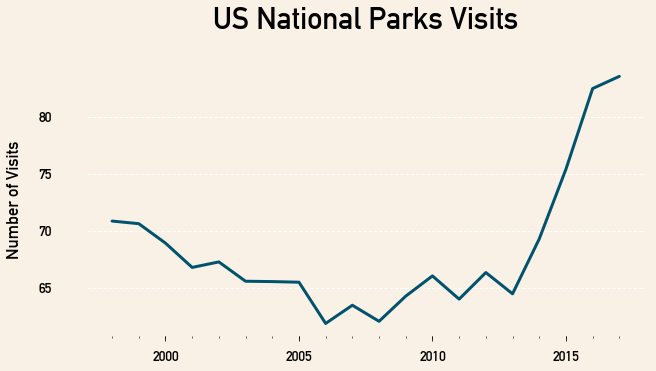

In [112]:
ax = parks_allnew.groupby('date_year').Visits.sum().plot(x='Year',kind = 'line',figsize=(10,5))
ax.yaxis.set_major_formatter(formatter)
plt.title("US National Parks Visits",pad = 35,loc='center',fontsize=30)

ax.grid(False, axis='x')
ax.set_ylabel("Number of Visits",labelpad = 15)
ax.set_xlabel("")



plt.savefig("NP_visits.pdf",bbox_inches='tight')
plt.savefig('NP_visits.png',dpi = 600, bbox_inches='tight')
plt.show()


In [505]:
parks = visits_long[['Park Name',1998,2007,2017]]

In [506]:
parks.head()

,Park Name,1998,2007,2017
0,Abraham Lincoln Birthplace NHP,250842.00,202950.00,269580
1,Acadia NP,2594497.00,2202228.00,3509271
2,Adams NHP,63569.00,224880.00,255562
3,African Burial Ground NM,0.00,0.00,43182
4,Agate Fossil Beds NM,17594.00,12997.00,32038


In [507]:
parks_new=parks[parks['Park Name'].str.contains(r"NP$")]

In [508]:
parks_new.head()

,Park Name,1998,2007,2017
1,Acadia NP,2594497.00,2202228.00,3509271
14,Arches NP,837161.00,860181.00,1539028
19,Badlands NP,1021049.00,886654.00,1054325
24,Big Bend NP,338442.00,364856.00,440276
30,Biscayne NP,403239.00,517442.00,446961


In [ ]:
parks_new[1998].nlargest(10)

In [ ]:
parks_new.shape
#52 National Parks in total

In [ ]:
top10parks = parks_new.sort_values(by=2017,ascending = False).head(10)['Park Name'].tolist()

In [ ]:
top10parks

***Let's try to turn the wide data to long data***

In [510]:
visits.dtypes

Park Name            object
Year                 object
Visits              float64
date_year    datetime64[ns]
dtype: object

In [511]:
visits_selected = visits[visits.date_year.isin([ '1998-01-01','2007-01-01','2017-01-01'])]

In [512]:
visits_selected=visits_selected[visits_selected['Park Name'].isin(top10parks)]

In [513]:
top10parks

['Acadia NP',
 'Glacier NP',
 'Grand Canyon NP',
 'Grand Teton NP',
 'Great Smoky Mountains NP',
 'Olympic NP',
 'Rocky Mountain NP',
 'Yellowstone NP',
 'Yosemite NP',
 'Zion NP']

In [514]:
visits_selected

,Park Name,Year,Visits,date_year
1,Acadia NP,1998,2594497.00,1998-01-01
147,Glacier NP,1998,1830944.00,1998-01-01
152,Grand Canyon NP,1998,4239682.00,1998-01-01
154,Grand Teton NP,1998,2757060.00,1998-01-01
158,Great Smoky Mountains NP,1998,9989395.00,1998-01-01
265,Olympic NP,1998,3577007.00,1998-01-01
297,Rocky Mountain NP,1998,3035422.00,1998-01-01
375,Yellowstone NP,1998,3120830.00,1998-01-01
376,Yosemite NP,1998,3657132.00,1998-01-01
378,Zion NP,1998,2370048.00,1998-01-01


In [561]:

plt.rcParams.update({

  'axes.prop_cycle': cycler('color', ['#f0bb7f','#d9816b','#90ced6','#00526d','#81ba9a','#f15b40']),
  'axes.facecolor': '#f9f1e6',
'axes.grid': True,
  

})


Text(0,1,'Up and Downs of The Most Popular National Parks of 2017')

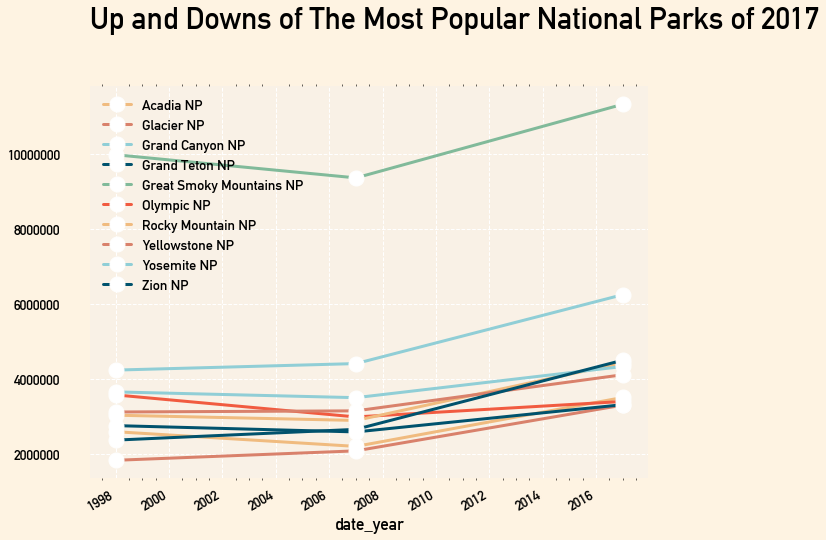

In [562]:
fig, ax = plt.subplots()
# Creating our list of labels, in alphabetical order
labels = top10parks
# Here, doing some styling (the legend will be ugly because I set the marker as being white dots)
# But this enables you to generate lines that are not continuous which kinda makes it look like your sketch
ax = visits_selected.groupby(['Park Name']).plot(marker = 'o', 
                                                 figsize = (10,8),
                                                 x='date_year',
                                                 y='Visits', 
                                                 linestyle='-',
                                                 ax=ax, 
                                                 markerfacecolor ='white', 
                                                 markeredgecolor ='white', 
                                                 markersize=15,
                                                )
plt.legend(labels=labels)
# Creating title
plt.title("Up and Downs of The Most Popular National Parks of 2017",pad = 58,loc='left',fontsize=30)


In [ ]:
visits_selected.groupby('date_year').Visits.nlargest(10)

In [ ]:
visits_selected.groupby(['Park Name']).Visits.plot(title='Hello')

In [ ]:
fig, ax = plt.subplots()
visits_selected.groupby('date_year').plot(marker = 'o',
                                                 figsize = (10,8),
                                                 x='date_year',
                                                 y='Visits',
                                                 title='Up and Downs of The Most Popular National Parks of 2017',
                                                 ax=ax)

In [ ]:
visits_selected.groupby(['date_year','Park Name']).Visits.nlargest(10)


In [ ]:
df = visits_selected.groupby('date_year').Visits.nlargest(10)


In [ ]:
.plot.scatter(x='date_year',y='Visits')

## Part 2: What is people's favourite overnight stays options? How do the preferences change over time?

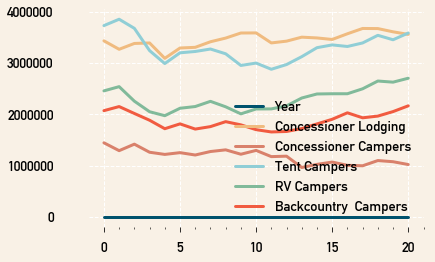

In [517]:
overnights = pd.read_excel('overnights_choices.xlsx')

overnights.plot()

In [518]:
overnights.head()

,Year,Concessioner Lodging,Concessioner Campers,Tent Campers,RV Campers,Backcountry Campers
0,2017,3437279,1447861,3734119,2460834,2074773
1,2016,3272026,1294573,3858162,2543221,2154698
2,2015,3385750,1421213,3680809,2260198,2020068
3,2014,3395578,1263610,3246320,2053965,1888095
4,2013,3095769,1221314,2993845,1976551,1722663


In [519]:
overnights['date_year'] = pd.to_datetime(overnights['Year'],format = '%Y')

In [520]:
overnights=overnights.drop(columns=['Year'])

In [521]:
overnights.tail()

,Concessioner Lodging,Concessioner Campers,Tent Campers,RV Campers,Backcountry Campers,date_year
16,3574734,1008618,3326852,2404840,2032886,2001-01-01
17,3678262,999658,3395816,2501401,1935276,2000-01-01
18,3676049,1101517,3544605,2652773,1968930,1999-01-01
19,3612940,1078800,3457825,2630972,2056747,1998-01-01
20,3562564,1023736,3589246,2707618,2169296,1997-01-01


In [522]:
from matplotlib.ticker import FuncFormatter

#step1: build a function
# it should take value and pos
def with_commas(value,x_pos):
    
    return "{:,}".format(int(value))

formatter = FuncFormatter(with_commas)



In [523]:
yearlist = []
n=1997
for i in range(21):
    yearlist.append(str(n)+'-01-01')
    n += 1
yearlist

['1997-01-01',
 '1998-01-01',
 '1999-01-01',
 '2000-01-01',
 '2001-01-01',
 '2002-01-01',
 '2003-01-01',
 '2004-01-01',
 '2005-01-01',
 '2006-01-01',
 '2007-01-01',
 '2008-01-01',
 '2009-01-01',
 '2010-01-01',
 '2011-01-01',
 '2012-01-01',
 '2013-01-01',
 '2014-01-01',
 '2015-01-01',
 '2016-01-01',
 '2017-01-01']

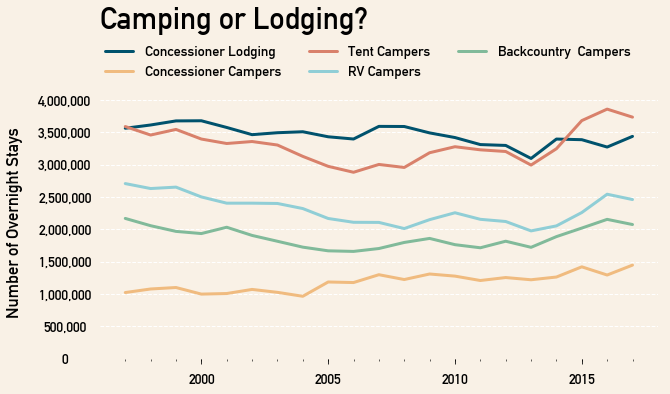

In [524]:
ax = overnights.plot(x='date_year',figsize=(10,5))
ax.yaxis.set_major_formatter(formatter)


# CUSTOMIZATION CODE GOES UNDER HERE

ax.set_title("Camping or Lodging?",pad = 58,loc='left',fontsize=30)
ax.legend(bbox_to_anchor=(0, 1.01, 1., .15), loc=3,
           ncol=3, borderaxespad=0)
ax.grid(False, axis='x')
ax.set_ylabel("Number of Overnight Stays",labelpad = 15)
ax.set_xlabel("")
ax.set_ylim(0,4200000)

ax.xaxis.tick_bottom()

#set number of tickers

ax.set_xticks(yearlist,minor=True)


plt.setp( ax.yaxis.get_majorticklabels(), ha="center" )



plt.rcParams.update({
  'lines.linewidth': 3,
  'lines.solid_capstyle': 'round',
  'font.family':'DIN Alternate' ,
  'font.stretch':'normal',
  'legend.fancybox': False,
  'legend.frameon':False,
  'axes.prop_cycle': cycler('color', ['#f0bb7f','#d9816b','#90ced6','#00526d','#81ba9a','#f15b40']),
  'axes.facecolor': '#f9f1e6',
'axes.grid': True,
  'axes.labelsize': 'large',
  'axes.axisbelow': True,
  'axes.formatter.limits':[-20,20],
  'axes.edgecolor': '#00526d',
  'axes.linewidth': 1.0,
  'axes.titlesize': 'x-large',
    'axes.spines.left'   : False,
    'axes.spines.bottom' : False,
    'axes.spines.top'    : False,
    'axes.spines.right'  : False,
 
  'grid.linestyle': '--',
  'grid.linewidth': 1.0,
  'grid.color': '#FFFFFF',
    'xtick.top'           : True,
    'xtick.major.pad': 10,
    'ytick.major.pad': 30,
    'ytick.left'           : True,
    'ytick.direction'      : 'out',
  'xtick.major.size': 0,
  'xtick.minor.size': 2,
  'ytick.major.size': 0,
  'ytick.minor.size': 0,
    'xtick.minor.visible'  : True,
  'font.size': 14.0,
    'savefig.facecolor'   : '#FFFFFF',


  'figure.facecolor': 'FFFFFF',
})


# then we save it
plt.savefig("graph_overnights_option.pdf",bbox_inches='tight')
plt.savefig('graph_overnights_option.png',bbox_inches='tight')
plt.show()

## Part 3: Which Month is the most popular month for NP visitation?

In [18]:
df = pd.read_excel('monthly_visits.xlsx')
df.head()

,Park,Region,State,Year,Month,Recreation Visits,Unnamed: 6
0,Acadia NP,Northeast,ME,1998,1,16726,NaN
1,Acadia NP,Northeast,ME,1998,2,17028,NaN
2,Acadia NP,Northeast,ME,1998,3,27500,NaN
3,Acadia NP,Northeast,ME,1998,4,81896,NaN
4,Acadia NP,Northeast,ME,1998,5,148052,NaN


In [19]:
monthly = pd.read_excel('monthly_visits.xlsx')
monthly = monthly[['Park','Region','State','Year','Month','Recreation Visits']]
monthly.shape

(14327, 6)

In [20]:
#changing column name
monthly.rename(columns={'Park': 'Park Name', 'Recreation Visits': 'Visits'}, inplace=True)

In [21]:
monthly.head()

,Park Name,Region,State,Year,Month,Visits
0,Acadia NP,Northeast,ME,1998,1,16726
1,Acadia NP,Northeast,ME,1998,2,17028
2,Acadia NP,Northeast,ME,1998,3,27500
3,Acadia NP,Northeast,ME,1998,4,81896
4,Acadia NP,Northeast,ME,1998,5,148052


In [25]:
def with_thousands(value,x_pos):
    thousands = int(value/1000)
    if thousands == 200:
        
        return "{} K".format(thousands)
    elif thousands ==0:
        return 0
    else:
        return thousands
    
formatter = FuncFormatter(with_thousands)

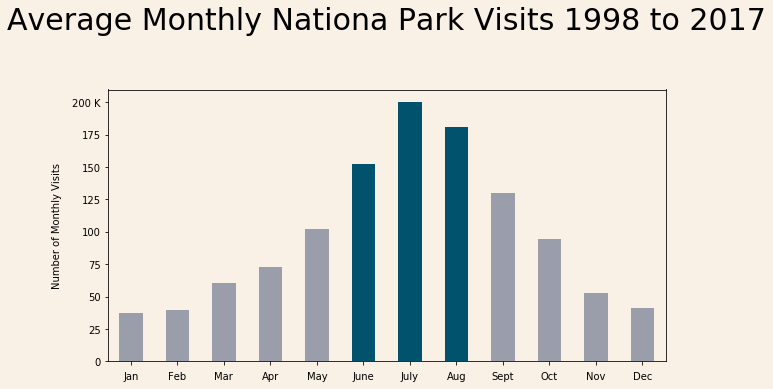

In [27]:

ax = monthly.groupby('Month')['Visits'].mean().plot(kind = 'bar', x='Month',y='Visits',figsize = (10,5))

plt.title("Average Monthly Nationa Park Visits 1998 to 2017",pad = 60,loc='center',fontsize=30)

ax.yaxis.set_major_formatter(formatter)

ax.set_xticklabels(["Jan", 'Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'],rotation= 'horizontal')

ax.grid(False, axis='x')

ax.tick_params(axis='x', which='major', pad=7)

plt.minorticks_off()

ax.set_ylabel("Number of Monthly Visits",labelpad = 10)
ax.set_xlabel("")


plt.rcParams.update({
  
  'axes.prop_cycle': cycler('color', ['#9a9eab','#9a9eab','#9a9eab','#9a9eab','#9a9eab','#00526d','#00526d','#00526d','#9a9eab','#9a9eab','#9a9eab','#9a9eab']),
    'figure.facecolor': '#f9f1e6',
    'axes.facecolor':'#f9f1e6',
    'savefig.facecolor'   : '#f9f1e6',
    
    
 })

plt.savefig("popular_month.pdf",bbox_inches='tight')
plt.show()                      



## Part 4: Is there a correlation between oil price and visits to national parks?

In [3]:
oil = pd.read_csv('oilmonthly.csv')

In [4]:
oil.head(10)

,DATE,DCOILWTICO
0,1998-01-02,17.41
1,1998-01-05,16.95
2,1998-01-06,16.64
3,1998-01-07,16.91
4,1998-01-08,17.01
5,1998-01-09,16.65
6,1998-01-12,16.53
7,1998-01-13,16.44
8,1998-01-14,16.54
9,1998-01-15,16.35


In [5]:
oil.rename(columns={'DCOILWTICO': 'oil_price'}, inplace=True)

In [6]:
oil['Year'] = oil.DATE.str.extract("^(\d\d\d\d)")

In [7]:
oil['Month'] = oil.DATE.str.extract("-0?([1-9]\d?)-")

In [8]:
oil['yr-mon'] = oil.DATE.str.extract("^(\d\d\d\d-0?[1-9]\d?)-")

In [9]:
oil.head()

,DATE,oil_price,Year,Month,yr-mon
0,1998-01-02,17.41,1998,1,1998-01
1,1998-01-05,16.95,1998,1,1998-01
2,1998-01-06,16.64,1998,1,1998-01
3,1998-01-07,16.91,1998,1,1998-01
4,1998-01-08,17.01,1998,1,1998-01


In [10]:
oil.dtypes

DATE         object
oil_price    object
Year         object
Month        object
yr-mon       object
dtype: object

In [13]:
oil.oil_price.replace('.',0,inplace = True)

In [14]:

oil['oil_price']=oil.oil_price.astype('float',inplace = True)


In [15]:
oil.dtypes

DATE          object
oil_price    float64
Year          object
Month         object
yr-mon        object
dtype: object

In [16]:
oil20 = oil.groupby('yr-mon').oil_price.mean().reset_index()
oil20.shape

(240, 2)

In [28]:
monthly.head()

,Park Name,Region,State,Year,Month,Visits
0,Acadia NP,Northeast,ME,1998,1,16726
1,Acadia NP,Northeast,ME,1998,2,17028
2,Acadia NP,Northeast,ME,1998,3,27500
3,Acadia NP,Northeast,ME,1998,4,81896
4,Acadia NP,Northeast,ME,1998,5,148052


In [29]:
monthly['yr-month'] = list(zip(monthly.Year, monthly.Month))

In [30]:
monthly.head()

,Park Name,Region,State,Year,Month,Visits,yr-month
0,Acadia NP,Northeast,ME,1998,1,16726,"(1998, 1)"
1,Acadia NP,Northeast,ME,1998,2,17028,"(1998, 2)"
2,Acadia NP,Northeast,ME,1998,3,27500,"(1998, 3)"
3,Acadia NP,Northeast,ME,1998,4,81896,"(1998, 4)"
4,Acadia NP,Northeast,ME,1998,5,148052,"(1998, 5)"


In [140]:
visits20 = monthly.groupby('yr-month').Visits.sum().reset_index()

In [190]:
visits20.head()

,yr-month,Visits
0,"(1998, 1)",2271598
1,"(1998, 2)",2480372
2,"(1998, 3)",3340077
3,"(1998, 4)",4425601
4,"(1998, 5)",6204019


In [189]:
visits20.dtypes

yr-month    object
Visits       int64
dtype: object

In [191]:
oil_visits = pd.concat([oil20,visits20],axis = 1).drop('yr-month',axis = 1)


In [192]:
oil_visits.head()

,yr-mon,oil_price,Visits
0,1998-01,15.93,2271598
1,1998-02,15.26,2480372
2,1998-03,15.12,3340077
3,1998-04,14.66,4425601
4,1998-05,14.20,6204019


In [195]:
oil_visits['date_year'] = pd.to_datetime(oil_visits['yr-mon'],format = '%Y-%m')


In [196]:
oil_visits

,yr-mon,oil_price,Visits,date_year
0,1998-01,15.93,2271598,1998-01-01
1,1998-02,15.26,2480372,1998-02-01
2,1998-03,15.12,3340077,1998-03-01
3,1998-04,14.66,4425601,1998-04-01
4,1998-05,14.20,6204019,1998-05-01


In [188]:
import statsmodels.api as sm

In [45]:
#After plotting the monthly data of both oil prices and visits, 
#i figured that the scatter plot didn't indicate any relationship
#i was thinking maybe i should control an 'invisible' varable here, which is climate 
#which actually affects the cyclical nature of the visitations monthly...

#Below I filtered out June data over the past 20 years and i want to see 
#if there's a correlation between the oil price and visitations 



In [146]:
X = oil_visits[oil_visits['yr-mon'].str.contains('-06')]['oil_price']
X = sm.add_constant(X)
Y = oil_visits[oil_visits['yr-mon'].str.contains('-06')]['Visits']

Series([], Name: Visits, dtype: float64)

In [147]:
#regressino on June data
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) # make the predictions by the model

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Visits   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                    0.4727
Date:                Sat, 21 Jul 2018   Prob (F-statistic):              0.501
Time:                        16:03:25   Log-Likelihood:                -301.67
No. Observations:                  20   AIC:                             607.3
Df Residuals:                      18   BIC:                             609.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.337e+06   4.33e+05     21.546      0.000    8.43e+06    1.02e+07
oil_price  -4421.5134   6430.958     -0.688      0.501   -1.79e+04    9089.427
==============================================================================
Omnibus:                       12.825   Durbin-Watson:                   0.200
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               10.625
Skew:                           1.628   Prob(JB):                      0.00493
Kurtosis:                       4.466   Cond. No.                         144.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
X = oil_visits[oil_visits['yr-mon'].str.contains('-06')]['oil_price']
X

5       13.721818
17      17.923182
29      31.822273
41      27.599048
53      25.518500
65      30.662381
77      36.296818
89      56.352273
101     70.950909
113     67.489048
125    133.880000
137     69.640909
149     75.335909
161     96.264091
173     82.303333
185     95.772500
197    105.794286
209     59.819545
221     48.757273
233     45.177727
Name: oil_price, dtype: float64

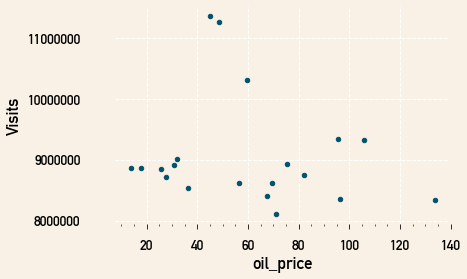

In [200]:
#scatter plot of June data points
oil_visits[oil_visits['yr-mon'].str.contains('-06')].plot(y = 'Visits', x = 'oil_price',kind = 'scatter')

In [ ]:
# a critical error that I might made here is that a liner regression model might not be the best fit for my dataset...

In [150]:
X = oil_visits['oil_price']
X = sm.add_constant(X)
Y = oil_visits['Visits']

In [151]:
#This is the first regression i run between 240 pairs of oil price and visits (each month's data for 20 yrs)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) # make the predictions by the model

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Visits   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.2593
Date:                Sat, 21 Jul 2018   Prob (F-statistic):              0.611
Time:                        16:04:48   Log-Likelihood:                -3943.6
No. Observations:                 240   AIC:                             7891.
Df Residuals:                     238   BIC:                             7898.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.581e+06   4.68e+05     11.920      0.000    4.66e+06     6.5e+06
oil_price   3831.3692   7524.302      0.509      0.611    -1.1e+04    1.87e+04
==============================================================================
Omnibus:                       35.168   Durbin-Watson:                   0.345
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.700
Skew:                           0.646   Prob(JB):                     7.14e-06
Kurtosis:                       2.164   Cond. No.                         136.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

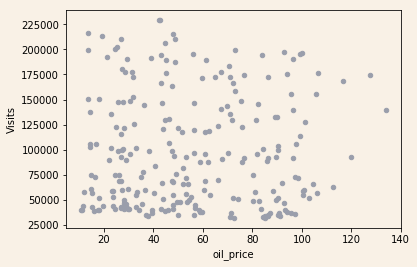

In [43]:
#scatter plot of all data points (monthly)
oil_visits.plot(y = 'Visits', x = 'oil_price',kind = 'scatter')

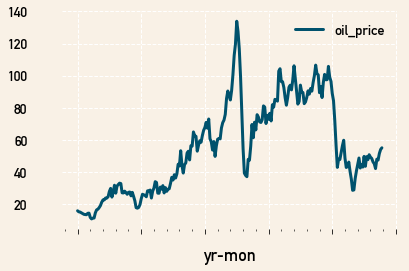

In [178]:
oil_visits.plot(x = 'yr-mon', y = 'oil_price')

In [181]:
oil_visits.dtypes

yr-mon        object
oil_price    float64
Visits         int64
dtype: object

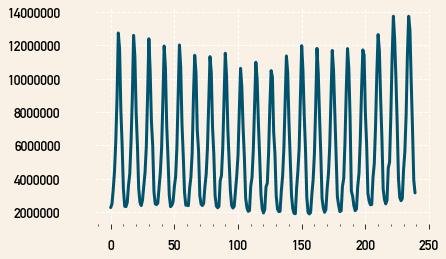

In [180]:
oil_visits['Visits'].plot(x = 'yr-mon', y = 'Visits')

In [130]:
NP_annual = parks_allnew.groupby('date_year').Visits.sum().reset_index()
NP_annual.head()

,date_year,Visits
0,1998-01-01,70862287.00
1,1999-01-01,70632517.00
2,2000-01-01,68925448.00
3,2001-01-01,66791331.00
4,2002-01-01,67275440.00


In [118]:
oil_annual = pd.read_csv('oilannual.csv')

In [123]:
oil_annual.head()

,DATE,DCOILWTICO
0,1998-01-01,14.42
1,1999-01-01,19.34
2,2000-01-01,30.38
3,2001-01-01,25.98
4,2002-01-01,26.18


In [125]:
oil_annual['date_year'] = pd.to_datetime(oil_annual['DATE'],format = '%Y-%m-%d')
oil_annual.rename(columns={'DCOILWTICO': 'oil_price'}, inplace=True)

In [127]:
oil_annual.shape

(20, 3)

In [131]:
Y = NP_annual.Visits
X = oil_annual['oil_price']
X = sm.add_constant(X)

In [132]:
#This is the third regression i run between 20 pairs of annual oil price and visits

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) # make the predictions by the model

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Visits   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     2.781
Date:                Sat, 21 Jul 2018   Prob (F-statistic):              0.113
Time:                        15:49:20   Log-Likelihood:                -338.61
No. Observations:                  20   AIC:                             681.2
Df Residuals:                      18   BIC:                             683.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.264e+07   2.94e+06     24.682      0.000    6.65e+07    7.88e+07
oil_price  -7.693e+04   4.61e+04     -1.668      0.113   -1.74e+05       2e+04
==============================================================================
Omnibus:                       13.492   Durbin-Watson:                   0.196
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               11.398
Skew:                           1.638   Prob(JB):                      0.00335
Kurtosis:                       4.714   Cond. No.                         146.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [212]:
oil_annual.dtypes

DATE                 object
oil_price           float64
date_year    datetime64[ns]
dtype: object

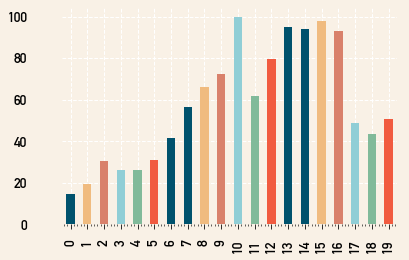

In [219]:
oil_annual.oil_price.plot(x='date_year',kind = 'bar')

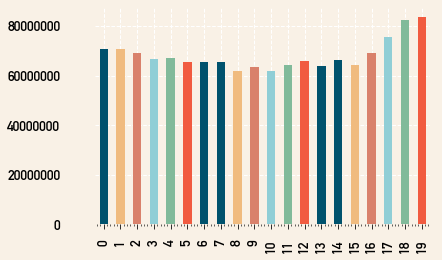

In [220]:
NP_annual.Visits.plot(x='date_year',kind='bar')

In [155]:
#Now a aregression on recession period (2008)

In [176]:
X = oil_visits[oil_visits['yr-mon'].str.contains('2008')]['oil_price']
X = sm.add_constant(X)
Y = oil_visits[oil_visits['yr-mon'].str.contains('2008')]['Visits']

In [177]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) # make the predictions by the model

model.summary()

/Users/christina/.pyenv/versions/3.6.5/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Visits   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     9.413
Date:                Sat, 21 Jul 2018   Prob (F-statistic):             0.0119
Time:                        16:31:39   Log-Likelihood:                -191.75
No. Observations:                  12   AIC:                             387.5
Df Residuals:                      10   BIC:                             388.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.842e+06   2.41e+06     -0.763      0.463   -7.22e+06    3.53e+06
oil_price   7.384e+04   2.41e+04      3.068      0.012    2.02e+04    1.27e+05
==============================================================================
Omnibus:                        2.716   Durbin-Watson:                   0.332
Prob(Omnibus):                  0.257   Jarque-Bera (JB):                0.996
Skew:                           0.026   Prob(JB):                        0.608
Kurtosis:                       1.589   Cond. No.                         363.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

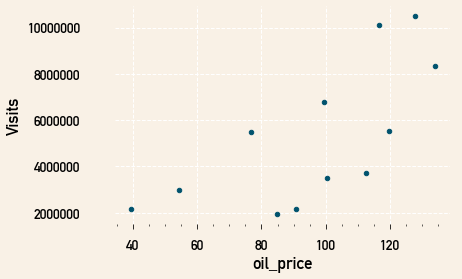

In [174]:
oil_visits[oil_visits['yr-mon'].str.contains('2008')].plot.scatter(x='oil_price',y='Visits')

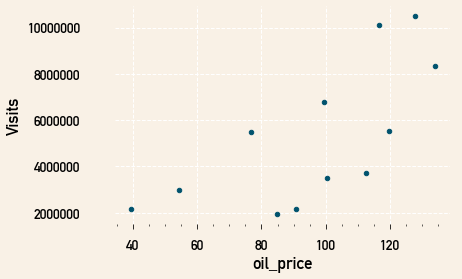

In [170]:
oil_visits[oil_visits['yr-mon'].str.contains('2008')].plot.scatter(x='oil_price',y='Visits')

In [160]:
oil_visits[oil_visits['yr-mon'].str.contains('2008')]

,yr-mon,oil_price,Visits
120,2008-01,84.89,1950410
121,2008-02,90.84,2165093
122,2008-03,100.43,3517070
123,2008-04,112.58,3733739
124,2008-05,119.70,5545067
125,2008-06,133.88,8344277
126,2008-07,127.57,10487888
127,2008-08,116.67,10092879
128,2008-09,99.38,6804880
129,2008-10,76.61,5485261


## Part 4(optional): How much time do people spent on their visits to National Park?

In [85]:
rec_hours = pd.read_excel('recreational_hours.xlsx').fillna(0)
rec_hours.head()

,Park Name,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Average
0,Abraham Lincoln Birthplace NHP,250842.00,251204.00,236180.00,229675.00,250772.00,211650.00,201828.00,190809.00,200054.00,...,221111.00,177122.00,163568.00,169515.00,163928.00,241264.00,148605.00,252495.00,269580,211677.80
1,Acadia NP,13838352.00,13910921.00,13230679.00,13467741.00,13683657.00,13012171.00,11822104.00,10568105.00,10720555.00,...,11447560.00,12827516.00,12101384.00,12458831.00,11347331.00,13085317.00,14452151.00,22698596.00,24014370,13532716.65
2,Adams NHP,58943.00,76985.00,77664.00,151073.00,156764.00,192381.00,199477.00,182457.00,186479.00,...,243357.00,87431.00,278448.00,406022.00,443617.00,210593.00,218988.00,212705.00,254438,202218.90
3,African Burial Ground NM,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,57657.00,54996.00,43878.00,54711.00,34407.00,36820.00,32801.00,32539,43476.12
4,Agate Fossil Beds NM,41269.00,44590.00,43545.00,42226.00,39598.00,37710.00,37756.00,36811.00,33141.00,...,33053.00,31635.00,28542.00,28369.00,25684.00,31035.00,35051.00,38642.00,65694,36754.45


In [87]:
years = list(rec_hours.columns.values)[1:-1]
years

[1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017]

In [88]:
#Turn off scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

#wide to long data form
hours = pd.melt(rec_hours, id_vars='Park Name', value_vars=years)


In [89]:
hours.rename(columns={'variable': 'Year', 'value': 'Recreational Hours'}, inplace=True)

In [90]:
hours

,Park Name,Year,Recreational Hours
0,Abraham Lincoln Birthplace NHP,1998,250842.00
1,Acadia NP,1998,13838352.00
2,Adams NHP,1998,58943.00
3,African Burial Ground NM,1998,0.00
4,Agate Fossil Beds NM,1998,41269.00
5,Alibates Flint Quarries NM,1998,8235.00
6,Allegheny Portage Railroad NHS,1998,121024.00
7,Amistad NRA,1998,8545197.00
8,Andersonville NHS,1998,451306.00
9,Andrew Johnson NHS,1998,35769.00


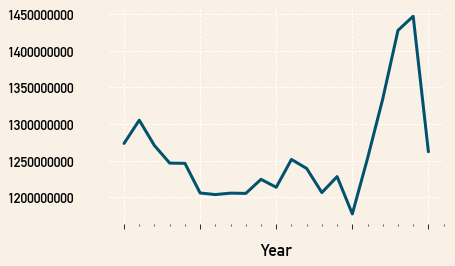

In [50]:
ax = hours.groupby('Year')['Recreational Hours'].sum().plot()

In [ ]:

plt.rcParams.update({
  'lines.linewidth': 3,
  'lines.solid_capstyle': 'round',
  'font.family':'DIN ALTERNATE' ,
  'font.stretch':'normal',
  'legend.fancybox': False,
  'legend.frameon':False,
  'axes.prop_cycle': cycler('color', ['#00526d','#f0bb7f','#d9816b','#90ced6','#81ba9a','#f15b40']),
  'axes.facecolor': '#f9f1e6',
 'axes.grid': True,
  'axes.labelsize': 'large',
  'axes.axisbelow': True,
  'axes.formatter.limits':[-20,20],
  'axes.edgecolor': '#00526d',
  'axes.linewidth': 1.0,
  'axes.titlesize': 'x-large',
    'axes.spines.left'   : False,
    'axes.spines.bottom' : False,
    'axes.spines.top'    : False,
    'axes.spines.right'  : False,
 
  'grid.linestyle': '--',
  'grid.linewidth': 1.0,
  'grid.color': '#FFFFFF',

    'xtick.major.pad': 10,
    'ytick.major.pad': 35,
    'ytick.left'           : True,
    'ytick.direction'      : 'out',
  'xtick.major.size': 5,
  'xtick.minor.size': 2,
  'ytick.major.size': 0,
  'ytick.minor.size': 0,
    'xtick.minor.visible'  : True,
  'font.size': 14.0,
  'figure.facecolor': '#f9f1e6',
#     'savefig.facecolor'   :  '#f9f1e6'  # figure facecolor when saving

})

#set number of tickers
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
majorLocator = MultipleLocator(1)
majorFormatter = FormatStrFormatter('%d')



plt.setp( ax.yaxis.get_majorticklabels(), ha="center" )

ax = visits.groupby('date_year').Visits.sum().plot(x='Year',kind = 'line',figsize=(10,5))
ax.yaxis.set_major_formatter(formatter)
ax.set_title("US National Parks Visits",pad = 35,loc='left',fontsize=30)

ax.grid(False, axis='x')
ax.set_ylabel("Number of Visits",labelpad = 15)
ax.set_xlabel("")
#ax.set_ylim(0,4200000)

ax.xaxis.tick_bottom()


plt.savefig("graph_visits2.pdf",bbox_inches='tight')
plt.savefig('graph_visits.png',bbox_inches='tight')
plt.show()